# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

In [2]:
def LoR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [3]:
def LoR_find_W_local_mul_class(X, Y, epoch = 1000, lr = 1):
    Xb = LoR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    K = Y.shape[1]
    W = np.random.randn(D_1, K)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        Yhat = LoR_find_Yhat_mul_class(X, W)
        error = (-Y*np.log(Yhat)).sum() #error = (-Y*np.log(Yhat) - (1 - Y)*np.log(1 - Yhat)).sum()
        error_list.append(error)
        S = np.dot(Xb.T, Y-Yhat)
        W = W + (lr/N)*S
    return W, error_list

In [4]:
def LoR_find_Yhat_mul_class(X, W):
    Xb = LoR_create_Xb(X)
    Z = np.dot(Xb, W)
    Yhat = np.exp(Z)/np.exp(Z).sum(axis=1, keepdims = True) #Softmax
    return Yhat

In [5]:
def find_error_mul_class(Y, Yhat):
    N = Y.shape[0]
    Y_argmax = np.argmax(Y, axis=1)
    Yhat_argmax = np.argmax(Yhat, axis=1)
    error = 100*(Y_argmax != Yhat_argmax).sum()/N
    return error

In [6]:
def create_onehot_target(label):
    K = len(np.unique(label))
    print(K)
    N = label.shape[0]
    print(N)
    onehot = np.zeros([N, K])
    for i in range(N):
        print(i)
        onehot[i, label[i, 0]] = 1
    return onehot

# 3. Normalization

In [7]:
def min4norm(Data):
    _min = Data.min(axis=0)
    return _min.reshape(1, -1)

In [8]:
def max4norm(Data):
    _max = Data.max(axis=0)
    return _max.reshape(1, -1)

In [9]:
def mean4norm(Data):
    _mean = Data.mean(axis=0)
    return _mean.reshape(1, -1)

In [10]:
def std4norm(Data):
    _std = Data.std(axis=0)
    return _std.reshape(1, -1)

In [11]:
def ed4norm(Data):
    _ed = np.sqrt((Data**2).sum(axis=0))
    return _ed.reshape(1, -1)

In [12]:
def minmaxNorm(Data, min_norm, max_norm):
    Data_Norm = (Data - min_norm)/(max_norm - min_norm)
    return Data_Norm

In [13]:
def meanNorm(Data, min_norm, max_norm, mean_norm):
    Data_Norm = (Data - mean_norm)/(max_norm - min_norm)
    return Data_Norm

In [14]:
def standardization(Data, mean_norm, std_norm):
    Data_Norm = (Data - mean_norm)/std_norm
    return Data_Norm

In [15]:
def SUL(Data, ed_norm):
    Data_Norm = Data/ed_norm
    return Data_Norm

In [16]:
def de_minmaxNorm(Data_Norm, min_norm, max_norm):
    Data = Data_Norm*(max_norm - min_norm) + min_norm
    return Data

In [17]:
def de_meanNorm(Data_Norm, min_norm, max_norm, mean_norm):
    Data = Data_Norm*(max_norm - min_norm) + mean_norm
    return Data

In [18]:
def de_standardization(Data_Norm, mean_norm, std_norm):
    Data = Data_Norm*std_norm + mean_norm
    return Data

In [19]:
def de_SUL(Data_Norm, ed_norm):
    Data = Data_Norm*ed_norm
    return Data

# 4. Read Data & Prepare Data

In [20]:
#https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset
Data = pd.read_csv('./Data_set/framingham.csv')

In [21]:
Data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [22]:
Data_dropout = Data.dropna()
Data_dropout

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [23]:
DataMatrix = Data_dropout.values

In [24]:
DataMatrix.shape

(3656, 16)

In [25]:
#D = DataMatrix.shape[1] - 1

In [26]:
#male	age
X_0 = DataMatrix[:1000, 0:2]
X_0

array([[ 1., 39.],
       [ 0., 46.],
       [ 1., 48.],
       ...,
       [ 1., 41.],
       [ 0., 46.],
       [ 0., 38.]])

In [27]:
# totChol	sysBP	diaBP --> BMI	heartRate
X_1 = DataMatrix[:1000, 13:14]
X_1

array([[ 80.],
       [ 95.],
       [ 75.],
       [ 65.],
       [ 85.],
       [ 77.],
       [ 60.],
       [ 79.],
       [ 76.],
       [ 93.],
       [ 75.],
       [ 72.],
       [ 98.],
       [ 65.],
       [ 95.],
       [ 64.],
       [ 80.],
       [ 75.],
       [ 85.],
       [ 72.],
       [ 70.],
       [ 71.],
       [ 75.],
       [ 62.],
       [ 73.],
       [ 85.],
       [ 72.],
       [ 60.],
       [ 75.],
       [ 90.],
       [ 96.],
       [ 95.],
       [ 75.],
       [ 60.],
       [ 71.],
       [ 68.],
       [ 75.],
       [ 75.],
       [ 76.],
       [ 65.],
       [ 90.],
       [ 75.],
       [ 95.],
       [ 60.],
       [ 90.],
       [ 80.],
       [ 63.],
       [ 88.],
       [ 88.],
       [ 75.],
       [ 65.],
       [ 75.],
       [ 95.],
       [ 60.],
       [ 78.],
       [ 83.],
       [ 75.],
       [ 72.],
       [100.],
       [ 65.],
       [ 76.],
       [ 63.],
       [ 63.],
       [ 85.],
       [ 64.],
       [ 65.],
       [ 8

In [28]:
X = np.hstack((X_0,X_1))
X

array([[ 1., 39., 80.],
       [ 0., 46., 95.],
       [ 1., 48., 75.],
       ...,
       [ 1., 41., 60.],
       [ 0., 46., 70.],
       [ 0., 38., 75.]])

In [29]:
Y = DataMatrix[:1000, 2:3]
Y #education

array([[4.],
       [2.],
       [1.],
       [3.],
       [3.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [3.],
       [2.],
       [3.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [4.],
       [2.],
       [3.],
       [1.],
       [4.],
       [4.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [3.],
       [2.],
       [2.],
       [2.],
       [3.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [4.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [4.],
       [4.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [4.],
       [3.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],

In [30]:
X.shape

(1000, 3)

In [31]:
Y.shape

(1000, 1)

In [32]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
onehotencoder = OneHotEncoder(categorical_features = [0]) 
data_Y = onehotencoder.fit_transform(Y).toarray()

C:\Users\diode\Anaconda3\envs\TF_PON\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\diode\Anaconda3\envs\TF_PON\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [33]:
data_Y

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [34]:
#_int = Y.astype(int)
#rint(Y_int.shape)

In [35]:
#Y_Y = create_onehot_target(Y_int)

In [36]:
#plt.scatter(DataMatrix[:, 0], Y)
#plt.scatter(DataMatrix[:, :D], DataMatrix[:, D:D+1])
#plt.plot(Y, label = '0-1')

In [37]:
# 3656-1656
X_Train = X_0[:700, :]
Y_Train = data_Y[:700, :]

In [38]:
X_Test = X_0[700:1000, :]
Y_Test = data_Y[700:1000, :]

In [39]:
X_Train.shape

(700, 2)

In [40]:
Y_Test.shape

(300, 4)

# 5. Create Model

In [41]:
min_X_Train = min4norm(X_Train)
max_X_Train = max4norm(X_Train)
mean_X_Train = mean4norm(X_Train)
std_X_Train = std4norm(X_Train)
ed_X_Train = ed4norm(X_Train)

In [42]:
# X_Train_Norm = minmaxNorm(X_Train, min_X_Train, max_X_Train)
X_Train_Norm = meanNorm(X_Train, min_X_Train, max_X_Train, mean_X_Train)
# X_Train_Norm = standardization(X_Train, mean_X_Train, std_X_Train)
# X_Train_Norm = SUL(X_Train, ed_X_Train)

In [43]:
'''min_Y_Train = min4norm(Y_Train)
max_Y_Train = max4norm(Y_Train)
mean_Y_Train = mean4norm(Y_Train)

Y_Train_Norm = meanNorm(Y_Train, min_Y_Train, max_Y_Train, mean_Y_Train)'''

'min_Y_Train = min4norm(Y_Train)\nmax_Y_Train = max4norm(Y_Train)\nmean_Y_Train = mean4norm(Y_Train)\n\nY_Train_Norm = meanNorm(Y_Train, min_Y_Train, max_Y_Train, mean_Y_Train)'

In [44]:
#W, error_list = LoR_find_W_local_mul_class(X_Train_Norm, Y_Train,epoch = 1000, lr = 0.001)
#W, error_list = LoR_find_W_local_mul_class(X_Train_Norm, Y_Train_Norm ,epoch = 1000, lr = 0.01)
W, error_list = LoR_find_W_local_mul_class(X_Train, Y_Train, epoch = 1000, lr = 0.001)

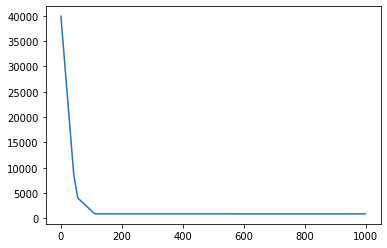

In [45]:
plt.plot(error_list)

In [46]:
W

array([[ 0.2151617 , -0.14438733, -0.0024655 , -0.51357844],
       [-0.20010432, -0.26969317, -0.84956054, -0.18184191],
       [ 0.35098943,  0.35046712,  0.33975625,  0.33832464]])

In [47]:
Yhat_Train = LoR_find_Yhat_mul_class(X_Train, W)

In [48]:
error_Train = find_error_mul_class(Y_Train, np.round(Yhat_Train, 0))

In [49]:
error_Train

58.57142857142857

In [98]:
print(Yhat_Train)

[[0.45270648 0.28880042 0.12273978 0.13575333]
 [0.41140409 0.28033925 0.19739807 0.11085859]
 [0.46564244 0.2956597  0.11410761 0.12459026]
 ...
 [0.39400886 0.27003279 0.2139163  0.12204205]
 [0.41140409 0.28033925 0.19739807 0.11085859]
 [0.40199919 0.27479037 0.20633388 0.11687656]]


In [83]:
Yhat_Train[0]

array([0.45270648, 0.28880042, 0.12273978, 0.13575333])

In [97]:
np.argmax(Yhat_Train, axis=1)[0]

0

In [99]:
np.argmin(Yhat_Train, axis=1)[0]

2

In [68]:
Y_Train[0]

array([0., 0., 0., 1.])

In [103]:
#for r in Y_Train:
    #print(r)
    #C = np.where(r==1)[0][0]
    #print(C+1)

In [108]:
Class_education = ['0','1','2','3','4']

for i in range(0, 700):
    
    #label = Y_Train[i]
    label = np.where(Y_Train[i]==1)[0][0] #np.argmax(Y_Train, axis=1)[i]
    label += 1
    
    predicted = np.argmax(Yhat_Train, axis=1)[i]
    predicted +=1
    
    #print(label)
    #print('Predicted: {}'.format(Class_education[int(predicted)]))
    #print(Class_education[int(label)])
    print('Predicted: {}, Actual: {}'.format(Class_education[int(predicted)], Class_education[int(label)]))


Predicted: 1, Actual: 4
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 3
Predicted: 1, Actual: 3
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 3
Predicted: 1, Actual: 2
Predicted: 1, Actual: 3
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 3
Predicted: 1, Actual: 2
Predicted: 1, Actual: 4
Predicted: 1, Actual: 2
Predicted: 1, Actual: 3
Predicted: 1, Actual: 1
Predicted: 1, Actual: 4
Predicted: 1, Actual: 4
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 3
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 3
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Ac

# 6. Make Prediction

In [53]:
#X_Test_Norm = minmaxNorm(X_Test, min_X_Train, max_X_Train)
#X_Test_Norm = meanNorm(X_Test, min_X_Train, max_X_Train, mean_X_Train)
# X_Test_Norm = standardization(X_Test, mean_X_Train, std_X_Train)
# X_Test_Norm = SUL(X_Test, ed_X_Train)

In [54]:
Y_Test

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [55]:
Yhat_Test = LoR_find_Yhat_mul_class(X_Test, W)

In [56]:
error_Test = find_error_mul_class(Y_Test, Yhat_Test)

In [57]:
error_Test

56.666666666666664

In [102]:
Yhat_Test

array([[0.46423514, 0.29492013, 0.11504786, 0.12579686],
       [0.46704215, 0.29639359, 0.11317216, 0.1233921 ],
       [0.42956401, 0.29088487, 0.18011923, 0.09943189],
       ...,
       [0.45563333, 0.2903641 , 0.12078892, 0.13321366],
       [0.41140409, 0.28033925, 0.19739807, 0.11085859],
       [0.39881921, 0.27290159, 0.20935264, 0.11892655]])

In [109]:
Class_education = ['0','1','2','3','4']

for i in range(0, 300):
    
    #label = Y_Train[i]
    label = np.where(Y_Test[i]==1)[0][0] #np.argmax(Y_Train, axis=1)[i]
    label += 1
    
    predicted = np.argmax(Yhat_Test, axis=1)[i]
    predicted +=1
    
    #print(label)
    #print('Predicted: {}'.format(Class_education[int(predicted)]))
    #print(Class_education[int(label)])
    print('Predicted: {}, Actual: {}'.format(Class_education[int(predicted)], Class_education[int(label)]))

Predicted: 1, Actual: 2
Predicted: 1, Actual: 3
Predicted: 1, Actual: 3
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 4
Predicted: 1, Actual: 1
Predicted: 1, Actual: 4
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 4
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 3
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 4
Predicted: 1, Actual: 3
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 3
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Ac